In [13]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import os

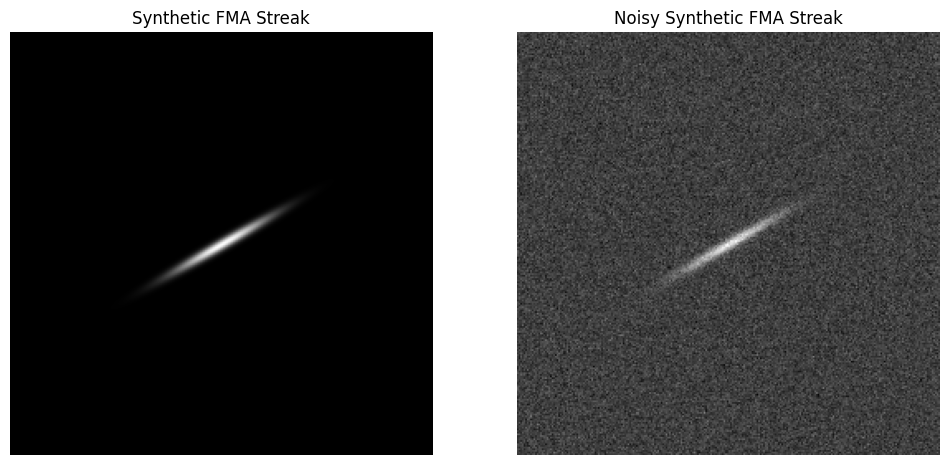

In [14]:
def gaussian_streak(image_size, center, length, width, direction, angle_deg, intensity):
    """
    Generate a synthetic Gaussian streak.

    Parameters:
    image_size (tuple): Size of the image (height, width).
    center (tuple): Center of the streak (x, y).
    length (float): Length of the streak.
    width (float): Width of the streak.
    direction (str): Direction of the streak ('horizontal', 'vertical', or 'diagonal').
    angle_deg (float): Angle of the streak in degrees (only applicable for 'diagonal' direction).
    intensity (float): Intensity of the streak.

    Returns:
    streak (numpy array): Synthetic Gaussian streak.
    """
    x0, y0 = center
    sigma_x = length / 2.355  # FWHM to standard deviation
    sigma_y = width / 2.355

    x = np.arange(0, image_size[1])
    y = np.arange(0, image_size[0])
    x, y = np.meshgrid(x, y)

    if direction == 'horizontal':
        # No rotation needed for horizontal streak
        x_rot = x - x0
        y_rot = y - y0
    elif direction == 'vertical':
        # No rotation needed for vertical streak
        x_rot = x - x0
        y_rot = y - y0
    elif direction == 'diagonal':
        # Convert angle from degrees to radians
        angle_rad = np.deg2rad(angle_deg)
        # Rotate coordinates for diagonal streak
        x_rot = (x - x0) * np.cos(angle_rad) + (y - y0) * np.sin(angle_rad)
        y_rot = -(x - x0) * np.sin(angle_rad) + (y - y0) * np.cos(angle_rad)
    else:
        raise ValueError("Invalid direction. Must be 'horizontal', 'vertical', or 'diagonal'.")

    # Gaussian profile
    streak = intensity * np.exp(-((x_rot)**2 / (2 * sigma_x**2) + (y_rot)**2 / (2 * sigma_y**2)))

    return streak

# Parameters
image_size = (256, 256)
center = (128, 128)
length = 55  # Length of streak
width = 5    # Width of streak
direction = 'diagonal'  # Direction of streak
angle_deg = 150 # Angle of streak in degrees
intensity = 1.0


# Generate streak
streak = gaussian_streak(image_size, center, length, width, direction, angle_deg, intensity)

# Add Gaussian noise
noise_level = 0.1  # Adjust this value to change the noise level
noise = np.random.normal(0, noise_level, image_size)
noisy_streak = streak + noise

# --- Save to a specific directory ---
save_dir = r"C:\Users\avsk1\OneDrive\Desktop\coding\more code\Synthetic Streaks"
if not os.path.exists(save_dir):
    os.makedirs(save_dir)  # Create directory if it doesn't exist

# Save the synthetic FMA streaks in FITS format

hdu = fits.PrimaryHDU(streak)
hdu.writeto(os.path.join(save_dir, 'synthetic_fma_streak_07.fits'), overwrite=True)

hdu = fits.PrimaryHDU(noisy_streak)
hdu.writeto(os.path.join(save_dir, 'noisy_synthetic_fma_streak_07.fits'), overwrite=True)

# Plot the results (optional)1
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(streak, cmap='gray')  # Use 'gray' colormap
plt.title('Synthetic FMA Streak')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(noisy_streak, cmap='gray')  # Use 'gray' colormap
plt.title('Noisy Synthetic FMA Streak')
plt.axis('off')

plt.show()